# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 12</font>

## Download: http://github.com/dsacademybr

In [ ]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

## Detecção de Emoções em Imagens com Inteligência Artificial

## Teste

In [ ]:
!pip install -q tensorflow==1.15.2

In [11]:
from scipy import misc
import numpy as np
import matplotlib.cm as cm
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import os, sys, inspect
from datetime import datetime
from matplotlib import pyplot as plt
import matplotlib as mat
import matplotlib.image as mpimg
from modulos import utils
from modulos.utils import testResult
from tensorflow.python.framework import ops
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import sklearn as sk
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
np.__version__

'1.19.2'

In [3]:
tf.__version__

'2.4.1'

In [4]:
mat.__version__

'3.2.1'

In [5]:
sk.__version__

'0.23.2'

In [12]:
import warnings
warnings.filterwarnings("ignore")
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
ops.reset_default_graph()

In [13]:
emotion = {0:'anger', 
           1:'disgust',
           2:'fear',
           3:'happy',
           4:'sad',
           5:'surprise',
           6:'neutral'}

In [14]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [15]:
sess = tf.InteractiveSession()

In [16]:
new_saver = tf.train.import_meta_graph('modelo/model.ckpt-900.meta')
new_saver.restore(sess, 'modelo/model.ckpt-900')
tf.get_default_graph().as_graph_def()

INFO:tensorflow:Restoring parameters from modelo/model.ckpt-900


node {
  name: "truncated_normal/shape"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
          dim {
            size: 4
          }
        }
        tensor_content: "\005\000\000\000\005\000\000\000\001\000\000\000 \000\000\000"
      }
    }
  }
}
node {
  name: "truncated_normal/mean"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
        }
        float_val: 0.0
      }
    }
  }
}
node {
  name: "truncated_normal/stddev"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_FLOAT
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_FLOAT
        tensor_shape {
        }
        float_val: 0.02
      }
    }
  }
}
node {
  name: "truncated_normal/TruncatedNormal"
  op: "T

In [17]:
x = sess.graph.get_tensor_by_name("input:0")
y_conv = sess.graph.get_tensor_by_name("output:0")

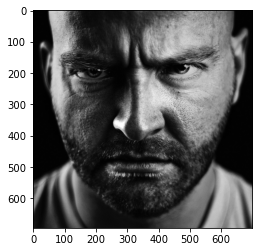

In [27]:
img = mpimg.imread('images_teste/image02.jpg')     
gray = rgb2gray(img)
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

In [28]:
image_0 = np.resize(gray,(1,48,48,1))
tResult = testResult()
num_evaluations = 50

In [29]:
for i in range(0, num_evaluations):
    result = sess.run(y_conv, feed_dict={x:image_0})
    label = sess.run(tf.argmax(result, 1))
    label = label[0]
    label = int(label)
    tResult.evaluate(label)
tResult.display_result(num_evaluations)

anger = 8.0%
disgust = 0.0%
fear = 57.99999999999999%
happy = 4.0%
sad = 0.0%
surprise = 30.0%
neutral = 0.0%


Para adquirir conhecimento técnico sólido e especializado em Deep Learning, Visão Computacional, Processamento de Linguagem Natural e outros temas relacionados à Inteligência Artificial, confira nosso programa completo: <a href="https://www.datascienceacademy.com.br/pages/formacao-inteligencia-artificial">Formação Inteligência Artificial</a>.

# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>